In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import hdbscan
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE

In [ ]:
# Preparing Dataset

In [2]:
df = pd.read_csv('clustering_features.csv')

In [3]:
# df2 excludes new group (Group 4 in the dataset)
df2 = df[df.Group != 4]

In [4]:
data = df.drop(['date', 'AccountId', 'Group', 'AvgDamageDealt', 'AvgWalkDistance', 'AvgWeapon', 'avgKilled'], axis = 1)
data2 = df2.drop(['date', 'AccountId', 'Group', 'AvgDamageDealt', 'AvgWalkDistance', 'AvgWeapon', 'avgKilled'], axis = 1)

In [5]:
data.head()
data2.head()

,MedDamage,MedWalk,MedWeapon,AFKRatio,MedKilled
0,0.000,0.000,0.0,0.540,1.0
1,0.000,110.841,2.0,0.647,1.0
2,0.000,43.342,1.0,0.871,2.0
3,407.842,1705.660,5.0,0.000,1.0
4,641.778,989.328,5.0,0.000,1.0


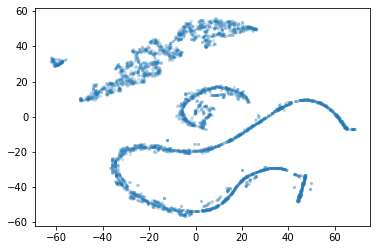

In [82]:
# Group 1,2,3,4
plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}
projection = TSNE(n_components= 2, perplexity = 50, random_state = 42).fit_transform(data)
plt.scatter(*projection.T, **plot_kwds)

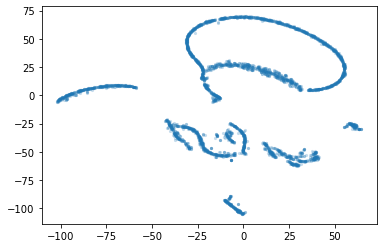

In [467]:
norm_data = Normalizer().fit_transform(data)
projection2 = TSNE(n_components=2, random_state = 42, perplexity = 50, n_iter = 6000).fit_transform(norm_data)
plt.scatter(*projection2.T, **plot_kwds)

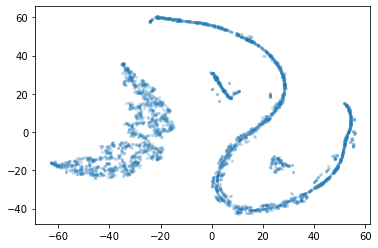

In [85]:
# Group 1,2,3
projection3 = TSNE(n_components=2, perplexity = 50, random_state = 42).fit_transform(data2)
plt.scatter(*projection3.T, **plot_kwds)

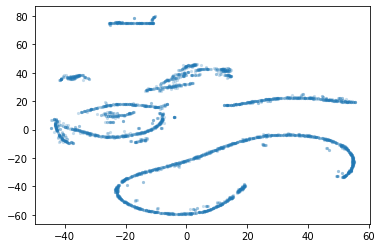

In [87]:
norm_data2 = Normalizer().fit_transform(data2)
projection4 = TSNE(n_components=2, random_state=42, perplexity = 50).fit_transform(norm_data2)
plt.scatter(*projection4.T, **plot_kwds)

# Clustering with HDBSCAN 

In [89]:
# HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#     gen_min_span_tree=False, leaf_size=40, memory=Memory(cachedir=None),
#     metric='euclidean', min_cluster_size=5, min_samples=None, p=None)

In [88]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 170, min_samples = 50)

In [90]:
clusterer.fit(data)
clusterer.labels_
clusterer.probabilities_
clusterer.labels_.max()

3

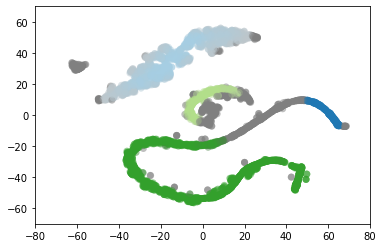

In [162]:
color_palette = sns.color_palette('Paired', 4)
cluster_colors = [color_palette[x] if x >= 0
                     else (0.5, 0.5, 0.5)
                     for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.xlim(-80, 80)
plt.ylim(-70, 70)
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [101]:
norm_clusterer = hdbscan.HDBSCAN(min_cluster_size = 160, min_samples = 45)
norm_clusterer.fit(norm_data)
norm_clusterer.labels_.max()

# 170, 40 (1272, 294, 295, 0)

3

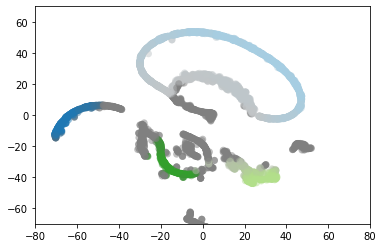

In [163]:
color_palette = sns.color_palette('Paired', 4)
cluster_colors = [color_palette[x] if x >= 0
                     else (0.5, 0.5, 0.5)
                     for x in norm_clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, norm_clusterer.probabilities_)]
plt.xlim(-80, 80)
plt.ylim(-70, 70)
plt.scatter(*projection2.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [138]:
clusterer2 = hdbscan.HDBSCAN(min_cluster_size = 160, min_samples = 45, prediction_data = True)
clusterer2.fit(data2)
clusterer2.labels_
clusterer2.probabilities_
clusterer2.labels_.max()

2

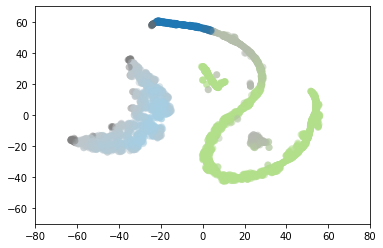

In [160]:
color_palette = sns.color_palette('Paired', 4)
cluster_colors = [color_palette[x] if x >= 0
                     else (0.5, 0.5, 0.5)
                     for x in clusterer2.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer2.probabilities_)]
plt.xlim(-80, 80)
plt.ylim(-70, 70)
plt.scatter(*projection3.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [140]:
norm_clusterer2 = hdbscan.HDBSCAN(min_cluster_size = 200, min_samples = 50, prediction_data = True)
norm_clusterer2.fit(norm_data2)
norm_clusterer2.labels_.max()

2

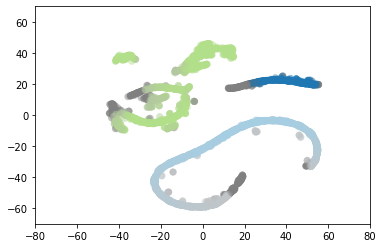

In [392]:
color_palette = sns.color_palette('Paired', 4)
cluster_colors = [color_palette[x] if x >= 0
                     else (0.5, 0.5, 0.5)
                     for x in norm_clusterer2.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, norm_clusterer2.probabilities_)]
plt.xlim(-80, 80)
plt.ylim(-70, 70)
plt.scatter(*projection4.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [130]:
print("UnNormalised Data")
df['clusters'] = clusterer.labels_
print(df.groupby('clusters').size())
print('Correct cases for Group 1:', len(df[(df['Group'] == 1) & (df['clusters']==0)]))
print('Correct cases for Group 2:', len(df[(df['Group'] == 2) & (df['clusters']==1)]))
print('Correct cases for Group 3:', len(df[(df['Group'] == 3) & (df['clusters']==2)]))
print('Correct cases for Group 4:', len(df[(df['Group'] == 4) & (df['clusters']==3)]))

print("\n Normalised Data")
df['clusters'] = norm_clusterer.labels_
print(df.groupby('clusters').size())
print('Correct cases for Group 1:', len(df[(df['Group'] == 1) & (df['clusters']==0)]))
print('Correct cases for Group 2:', len(df[(df['Group'] == 2) & (df['clusters']==1)]))
print('Correct cases for Group 3:', len(df[(df['Group'] == 3) & (df['clusters']==2)]))
print('Correct cases for Group 4:', len(df[(df['Group'] == 4) & (df['clusters']==3)]))

print("\n UnNormalised Data2")
df2['clusters'] = clusterer2.labels_
print(df2.groupby('clusters').size())
print('Correct cases for Group 1:', len(df2[(df2['Group'] == 1) & (df2['clusters']==0)]))
print('Correct cases for Group 2:', len(df2[(df2['Group'] == 2) & (df2['clusters']==1)]))
print('Correct cases for Group 3:', len(df2[(df2['Group'] == 3) & (df2['clusters']==2)]))

print("\n Normalised Data2")
df2['clusters'] = norm_clusterer2.labels_
print(df2.groupby('clusters').size())
print('Correct cases for Group 1:', len(df2[(df2['Group'] == 1) & (df2['clusters']==0)]))
print('Correct cases for Group 2:', len(df2[(df2['Group'] == 2) & (df2['clusters']==1)]))
print('Correct cases for Group 3:', len(df2[(df2['Group'] == 3) & (df2['clusters']==2)]))

UnNormalised Data
clusters
-1     764
 0    1258
 1     189
 2     330
 3    1432
dtype: int64
Correct cases for Group 1: 1258
Correct cases for Group 2: 181
Correct cases for Group 3: 0
Correct cases for Group 4: 14

 Normalised Data
clusters
-1    1227
 0    1772
 1     298
 2     378
 3     298
dtype: int64
Correct cases for Group 1: 1265
Correct cases for Group 2: 291
Correct cases for Group 3: 19
Correct cases for Group 4: 6

 UnNormalised Data2
clusters
-1      51
 0    1265
 1     226
 2    1832
dtype: int64
Correct cases for Group 1: 1265
Correct cases for Group 2: 218
Correct cases for Group 3: 766

 Normalised Data2
clusters
-1     528
 0    1311
 1     288
 2    1247
dtype: int64
Correct cases for Group 1: 1266
Correct cases for Group 2: 281
Correct cases for Group 3: 670


/tmp/ipykernel_176558/2972208931.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = clusterer2.labels_
/tmp/ipykernel_176558/2972208931.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = norm_clusterer2.labels_


<AxesSubplot:ylabel='$\\lambda$ value'>

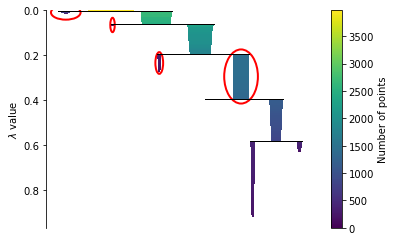

In [132]:
clusterer.condensed_tree_.plot(select_clusters=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

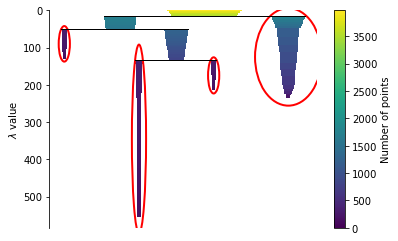

In [133]:
norm_clusterer.condensed_tree_.plot(select_clusters=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

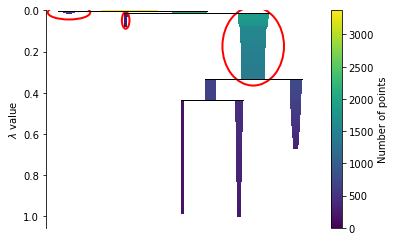

In [134]:
clusterer2.condensed_tree_.plot(select_clusters=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

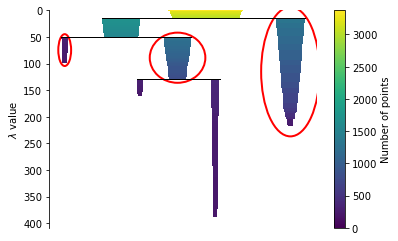

In [135]:
norm_clusterer2.condensed_tree_.plot(select_clusters=True)

In [181]:
norm_clusterer.condensed_tree_.to_networkx().number_of_nodes()

3980

In [652]:
tree = norm_clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size>1]

In [653]:
cluster_tree

,parent,child,lambda_val,child_size
467,3973,3974,12.884940,1781
468,3973,3975,12.884940,1725
868,3975,3976,50.094736,280
869,3975,3977,50.094736,1246
2003,3977,3978,104.664136,483
2004,3977,3979,104.664136,374


<AxesSubplot:ylabel='distance'>

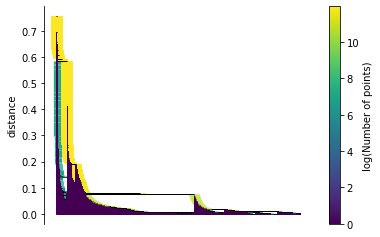

In [654]:
clusterer.single_linkage_tree_.plot()

In [425]:
# group 4
new_group = df[df.Group == 4]
new = new_group.drop(['date', 'AccountId', 'Group', 'AvgDamageDealt', 'AvgWalkDistance', 'AvgWeapon', 'avgKilled'], axis = 1)

# group 3
new_group3 = df[df.Group == 3]
new3 = new_group3.drop(['date', 'AccountId', 'Group', 'AvgDamageDealt', 'AvgWalkDistance', 'AvgWeapon', 'avgKilled'], axis = 1)

# group 2
new_group2 = df[df.Group == 2]
new2 = new_group2.drop(['date', 'AccountId', 'Group', 'AvgDamageDealt', 'AvgWalkDistance', 'AvgWeapon', 'avgKilled'], axis = 1)

# group 1
new_group1 = df[df.Group == 1]
new1 = new_group1.drop(['date', 'AccountId', 'Group', 'AvgDamageDealt', 'AvgWalkDistance', 'AvgWeapon', 'avgKilled'], axis = 1)

# Checking Individual Groups with T_SNE

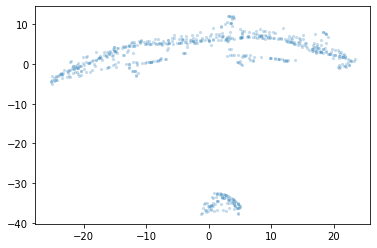

In [428]:
# Group 4 
projection5 = TSNE(n_components= 2, perplexity = 50, random_state = 42).fit_transform(new)
plt.scatter(*projection5.T, **plot_kwds)

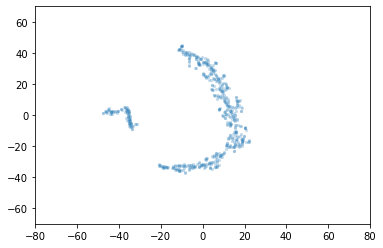

In [390]:
new_norm = Normalizer().fit_transform(new)
projection6 = TSNE(n_components= 2, perplexity = 25, random_state = 37).fit_transform(new_norm)
plt.xlim(-80, 80)
plt.ylim(-70, 70)
plt.scatter(*projection6.T, **plot_kwds)

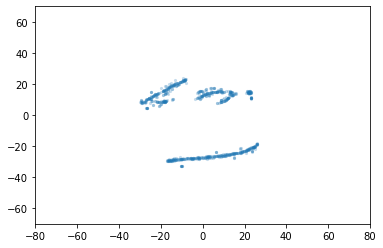

In [464]:
# Group 3
new3_norm = Normalizer().fit_transform(new3)
projection6 = TSNE(n_components= 2, perplexity = 40, random_state = 1234).fit_transform(new3_norm)
plt.xlim(-80, 80)
plt.ylim(-70, 70)
plt.scatter(*projection6.T, **plot_kwds)

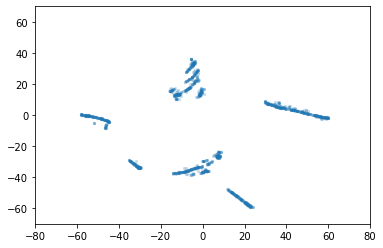

In [466]:
# Group 2
new2_norm = Normalizer().fit_transform(new2)
projection7 = TSNE(n_components= 2, perplexity = 50, random_state = 26, n_iter = 5000).fit_transform(new2_norm)
plt.xlim(-80, 80)
plt.ylim(-70, 70)
plt.scatter(*projection7.T, **plot_kwds)

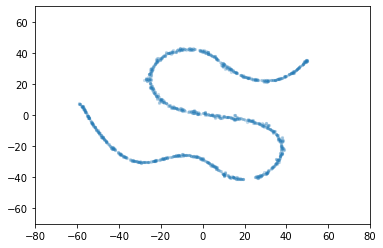

In [454]:
# Group 1
new1_norm = Normalizer().fit_transform(new1)
projection8 = TSNE(n_components= 2, perplexity = 25, random_state = 3).fit_transform(new1_norm)
plt.xlim(-80, 80)
plt.ylim(-70, 70)
plt.scatter(*projection8.T, **plot_kwds)

# Inspect clusters 

In [424]:
df2[df2['clusters'] == 2].groupby('Group').size()

Group
2    577
3    670
dtype: int64

In [420]:
df[df['clusters'] == 3].groupby('Group').size()

Group
3    292
4      6
dtype: int64